# 6. Evaluacion modelos de clasificacion binaria con sobremuestreo aleatorio y datos normalizados
***

### Caso de estudio #1

### Tecnicas de ajuste de los datos y modelos:

| Ingeniería de datos       | Si / No       |
| :-------                  | :------:      |
| Escalado de datos         | Si           |
| Ajuste de hiperparametros | Si            |
| Sobremuestreo             | Si            |
| Ajuste de pesos de clase  | No            |



### Cargar librerias

In [1]:
# librerias
import numpy as np
import math
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import seaborn as sns
import pandas_profiling
np.random.seed(9999) 

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score
from plot_metric.functions import BinaryClassification
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from yellowbrick.classifier import ConfusionMatrix
from sklearn.metrics import classification_report

# sobremuestreo
from imblearn.over_sampling import RandomOverSampler

#escalado
from sklearn.preprocessing import MinMaxScaler

from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier


Using TensorFlow backend.


### Funciones

In [2]:
# BINARIA funcion para generar matriz de confusion y medidas de desempeño del modelos clasificacion binarios
def model_evaluation(data_train, label_train, data_test, label_test, modelo, label_pred):
    print('\n')
    print("MATRIZ DE CONFUSION")
    print('\n')
    matriz = confusion_matrix(label_test, label_pred)
    #print(matriz)
    classes = ["Funcional","Falla potencial"]
    cm = ConfusionMatrix(modelo, classes=classes, label_encoder={0:"Funcional", 1:"Falla Potencial"})
    cm.fit(data_train, label_train)
    cm.score(data_test, label_test)
    cm.show()
    # Medidas de desempeño del modelo
    print('\n')
    print("MEDIDAS DE DESEMPEÑO DEL MODELO")
    print('\n')
    print('Exactitud - Accuracy: {}'.format(modelo.score(data_test, label_test)))
    print('ROC AUC: {}'.format (metrics.roc_auc_score(label_test, label_pred)))
    print('-'*60)
    print('Precisión por clase: {}'.format(metrics.precision_score(label_test, label_pred, average=None)))
    print('Sensibilidad - Recall por clase: {}'.format(metrics.recall_score(label_test, label_pred, average=None)))
    print('F1 por clase: {}'.format(metrics.f1_score(label_test, label_pred, average=None)))
    print('-'*60)
    print('F1 Macro: {}'.format(metrics.f1_score(label_test, label_pred, average='macro')))
    print('F1 Micro: {}'.format(metrics.f1_score(label_test, label_pred, average='micro')))
    print('F1 Weighted: {}'.format(metrics.f1_score(label_test, label_pred, average='weighted')))
    print('-'*60)
    print('Sensibilidad - Recall Macro: {}'.format(metrics.recall_score(label_test, label_pred, average='macro')))
    print('Sensibilidad - Recall Micro: {}'.format(metrics.recall_score(label_test, label_pred, average='micro')))
    print('Sensibilidad - Recall Weighted: {}'.format(metrics.recall_score(label_test, label_pred, average='weighted')))
    print('-'*60)
    print('Precisión Macro: {}'.format(metrics.precision_score(label_test, label_pred, average='macro')))
    print('Precisión Micro: {}'.format(metrics.precision_score(label_test, label_pred, average='micro')))
    print('Precisión Weighted: {}'.format(metrics.precision_score(label_test, label_pred, average='weighted')))
    
    TP = matriz[1][1]
    TN = matriz[0][0]
    FP = matriz[0][1]
    FN = matriz[1][0]
    print('-'*60)
    print('Verdaderos positivos - True Positives:', TP)
    print('Verdaderos negativos - True Negatives:', TN)
    print('Falsos positivos - False Positives:', FP)
    print('Falsos negativos - False Negatives:', FN)
        # calculate accuracy
    conf_accuracy = (float (TP+TN) / float(TP + TN + FP + FN))
        # calculate mis-classification
    conf_misclassification = 1- conf_accuracy
        # calculate the sensitivity
    conf_sensitivity = (TP / float(TP + FN))
        # calculate the specificity
    conf_specificity = (TN / float(TN + FN))
        # calculate precision
    conf_precision = (TP / float(TP + FP))
        # calculate f_1 score
    conf_f1 = 2 * ((conf_precision * conf_sensitivity) / (conf_precision + conf_sensitivity))
        # calculate FPR tasa de falsos positivos
    conf_FPR = 1 - conf_specificity
    print('-'*60)
    print(f'Error de clasificacion: {round(conf_misclassification,3)}') 
    print(f'Especificidad - Specificity: {round(conf_specificity,3)}') 
    print(f'Tasa de falsos positivos FPR: {round(conf_FPR,3)}')
    print('-'*60)
   
    print(classification_report(label_test, label_pred))
    # curva ROC clasificacion binaria
    bc = BinaryClassification(label_test, label_pred, labels=["Class 0", "Class 1"])
    plt.figure(figsize=(5,5))
    bc.plot_roc_curve()
    print('\n')
    print("CURVA ROC")
    plt.show()

In [4]:
# ruta para grabar medidas de desempeño
ruta5 = "D:/alexh/Documents/Maestria en estadistica/proyecto de grado/cuadernos proyecto/Nasa Turbo Fan/Modelos 5.xlsx"
writer = pd.ExcelWriter(ruta5, engine='openpyxl')

### Preparar datos agil

In [5]:
columns=["id","ciclo","set1","set2","set3","sensor1","sensor2","sensor3","sensor4","sensor5","sensor6","sensor7","sensor8",
         "sensor9","sensor10","sensor11","sensor12","sensor13","sensor14","sensor15","sensor16","sensor17","sensor18","sensor19"
         ,"sensor20","sensor21","sensor22","sensor23"]
train=pd.read_csv("train_FD001.txt",sep=" ",names=columns)
test=pd.read_csv("test_FD001.txt",sep=" ",names=columns)
rul=pd.read_csv("RUL_FD001.txt",sep=" ",header=None)
train.drop(['sensor22','sensor23'], axis=1, inplace=True)
test.drop(['sensor22','sensor23'], axis=1, inplace=True)
rul.drop([1], axis=1, inplace=True)
rul.columns = ['ttf']
rul2=pd.DataFrame(train.groupby('id')['ciclo'].max()).reset_index()
rul2.columns = ['id', 'falla']
train= train.merge(rul2, on=['id'], how='left')
train['ttf'] = train['falla'] - train['ciclo']
train.drop('falla', axis=1, inplace=True)
train['clase1']=np.where(train['ttf'] <= 30, 1, 0)
train['clase2']=train['clase1']
train.loc[train['ttf']<=15, 'clase2'] =2
rul3=pd.DataFrame(test.groupby('id')['ciclo'].max()).reset_index()
rul3.columns = ['id', 'falla']
rul['id'] = rul.index + 1
rul['falla'] = rul3['falla'] + rul['ttf']
rul.drop('ttf', axis=1, inplace=True)
test=test.merge(rul, on=['id'], how='left')
test['ttf'] = test['falla'] - test['ciclo']
test.drop('falla', axis=1, inplace=True)
test['clase1']=np.where(test['ttf'] <= 30, 1, 0)
test['clase2']=test['clase1']
test.loc[test['ttf']<=15, 'clase2'] =2
data_train=train.iloc[:,np.r_[2:26]]
label_train=train.iloc[:,27]
data_test=test.iloc[:,np.r_[2:26]]
label_test=test.iloc[:,27]
label_train2=train.iloc[:,28]
label_test2=test.iloc[:,28]

In [6]:
data_train.head()

,set1,set2,set3,sensor1,sensor2,sensor3,sensor4,sensor5,sensor6,sensor7,...,sensor12,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21
0,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,21.61,554.36,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,21.61,553.75,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,21.61,554.26,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,21.61,554.45,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,21.61,554.00,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


In [7]:
# normalizacion de datos de entrenamiento
scaler = MinMaxScaler()
scaled_features_train = scaler.fit_transform(data_train.values)
scaled_features_df_train = pd.DataFrame(scaled_features_train, index=data_train.index, columns=data_train.columns)
data_train=scaled_features_df_train
data_train.head()


,set1,set2,set3,sensor1,sensor2,sensor3,sensor4,sensor5,sensor6,sensor7,...,sensor12,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21
0,0.459770,0.166667,0.0,0.0,0.183735,0.406802,0.309757,0.0,1.0,0.726248,...,0.633262,0.205882,0.199608,0.363986,0.0,0.333333,0.0,0.0,0.713178,0.724662
1,0.609195,0.250000,0.0,0.0,0.283133,0.453019,0.352633,0.0,1.0,0.628019,...,0.765458,0.279412,0.162813,0.411312,0.0,0.333333,0.0,0.0,0.666667,0.731014
2,0.252874,0.750000,0.0,0.0,0.343373,0.369523,0.370527,0.0,1.0,0.710145,...,0.795309,0.220588,0.171793,0.357445,0.0,0.166667,0.0,0.0,0.627907,0.621375
3,0.540230,0.500000,0.0,0.0,0.343373,0.256159,0.331195,0.0,1.0,0.740741,...,0.889126,0.294118,0.174889,0.166603,0.0,0.333333,0.0,0.0,0.573643,0.662386
4,0.390805,0.333333,0.0,0.0,0.349398,0.257467,0.404625,0.0,1.0,0.668277,...,0.746269,0.235294,0.174734,0.402078,0.0,0.416667,0.0,0.0,0.589147,0.704502


In [8]:
data_test.head()

,set1,set2,set3,sensor1,sensor2,sensor3,sensor4,sensor5,sensor6,sensor7,...,sensor12,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21
0,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,21.61,553.90,...,521.72,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735
1,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,21.61,554.85,...,522.16,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916
2,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,21.61,554.11,...,521.97,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166
3,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,21.61,554.07,...,521.38,2388.05,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737
4,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,21.61,554.16,...,522.15,2388.03,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130


In [9]:
# normalizacion de datos de prueba
scaler = MinMaxScaler()
scaled_features_test = scaler.fit_transform(data_test.values)
scaled_features_df_test = pd.DataFrame(scaled_features_test, index=data_test.index, columns=data_test.columns)
data_test=scaled_features_df_test
data_test.head()


,set1,set2,set3,sensor1,sensor2,sensor3,sensor4,sensor5,sensor6,sensor7,...,sensor12,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21
0,0.65625,0.692308,0.0,0.0,0.596215,0.421968,0.282214,0.0,1.0,0.608871,...,0.534247,0.325581,0.152259,0.347076,0.0,0.375,0.0,0.0,0.500000,0.620099
1,0.34375,0.230769,0.0,0.0,0.182965,0.504025,0.225240,0.0,1.0,0.800403,...,0.634703,0.395349,0.277907,0.227709,0.0,0.500,0.0,0.0,0.645455,0.645718
2,0.53125,0.538462,0.0,0.0,0.419558,0.464814,0.346130,0.0,1.0,0.651210,...,0.591324,0.325581,0.192892,0.533557,0.0,0.500,0.0,0.0,0.700000,0.681104
3,0.77500,0.461538,0.0,0.0,0.413249,0.391587,0.449867,0.0,1.0,0.643145,...,0.456621,0.372093,0.217896,0.282359,0.0,0.250,0.0,0.0,0.627273,0.620382
4,0.60000,0.461538,0.0,0.0,0.435331,0.471306,0.357974,0.0,1.0,0.661290,...,0.632420,0.325581,0.187891,0.337009,0.0,0.125,0.0,0.0,0.618182,0.676008


Text(0.5, 1.0, 'Funcional (0) Vs. Falla potencial (1)')

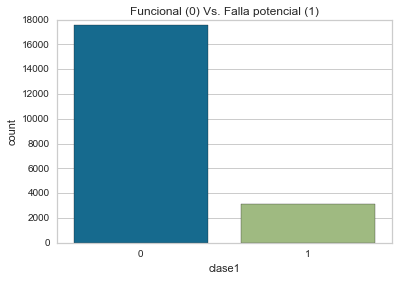

In [10]:
sns.countplot(label_train)
plt.title('Funcional (0) Vs. Falla potencial (1)')

In [11]:
# sobremuestreo aleatorio
ros = RandomOverSampler(random_state=0)
data_traino, label_traino = ros.fit_resample(data_train, label_train)

# conteo
from collections import Counter
print(sorted(Counter(label_traino).items()))

[(0, 17531), (1, 17531)]


In [12]:
label_train=pd.Series(label_traino)

Text(0.5, 1.0, 'Funcional (0) Vs. Falla potencial (1)')

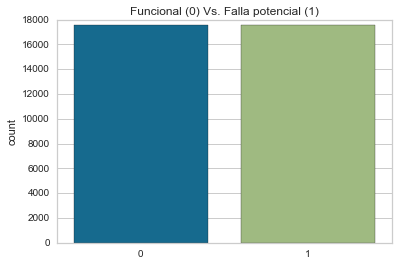

In [13]:
sns.countplot(label_train)
plt.title('Funcional (0) Vs. Falla potencial (1)')

In [14]:
data_train= pd.DataFrame(data_traino, columns=data_train.columns)

In [15]:
print("numero de dimensiones =", data_train.ndim)
print("tamaño de la tabla =", data_train.shape)
print("total datos =", data_train.size)

numero de dimensiones = 2
tamaño de la tabla = (35062, 24)
total datos = 841488


# Modelos de clasificacion binaria con sobremuestreo aleatorio y datos normalizados

## Modelo Random Forest 

In [96]:
modelo1=RandomForestClassifier(random_state=0, n_estimators=10)
modelo1.fit(data_train, label_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [97]:
label_pred1 = modelo1.predict(data_test)

In [98]:
# para evaluar cuales caracteristicas tiene mayor peso en el modelo
fi=modelo1.feature_importances_
fi

array([0.00983031, 0.00707437, 0.        , 0.        , 0.07066728,
       0.029565  , 0.10903923, 0.        , 0.        , 0.1522517 ,
       0.01313126, 0.04906032, 0.        , 0.04169869, 0.094952  ,
       0.01382081, 0.02845073, 0.17013527, 0.        , 0.11215686,
       0.        , 0.        , 0.07504346, 0.02312272])

#### Evaluacion del modelo



MATRIZ DE CONFUSION




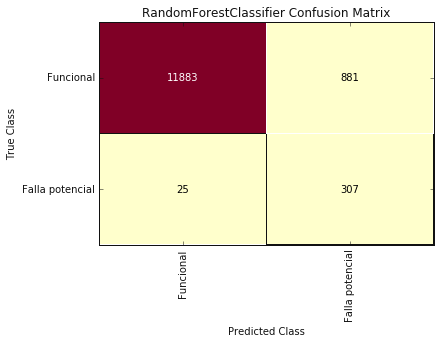



MEDIDAS DE DESEMPEÑO DEL MODELO


Exactitud - Accuracy: 0.9308185705558949
ROC AUC: 0.9278382725511887
------------------------------------------------------------
Precisión por clase: [0.99790057 0.25841751]
Sensibilidad - Recall por clase: [0.93097775 0.9246988 ]
F1 por clase: [0.96327821 0.40394737]
------------------------------------------------------------
F1 Macro: 0.6836127892688921
F1 Micro: 0.9308185705558949
F1 Weighted: 0.9490984728348923
------------------------------------------------------------
Sensibilidad - Recall Macro: 0.9278382725511887
Sensibilidad - Recall Micro: 0.9308185705558949
Sensibilidad - Recall Weighted: 0.9308185705558949
------------------------------------------------------------
Precisión Macro: 0.6281590397310921
Precisión Micro: 0.9308185705558949
Precisión Weighted: 0.979153749359259
------------------------------------------------------------
Verdaderos positivos - True Positives: 307
Verdaderos negativos - True Negatives: 11883
Falsos positivo

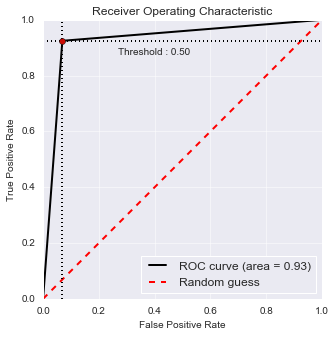

In [99]:
# métricas de desempeño - evaluación del modelo
model_evaluation(data_train, label_train, data_test, label_test, modelo1, label_pred1)

In [100]:
# grabar las medidas de desempeño
report1 = classification_report(label_test, label_pred1, output_dict=True)
df = pd.DataFrame(report1).transpose()
df.to_excel(writer, sheet_name='Random Forest')
writer.save()

### Modelo Random Forest con Grid Search

In [101]:
model = RandomForestClassifier(random_state=0)
parameters= {'n_estimators': [10, 50, 100, 200, 300, 400],
             'max_features': ['log2', 'sqrt', 'auto'],
             'criterion': ['entropy', 'gini'],
             'max_depth': [2, 4, 6, 8, 10]                 
}

acc_scorer=make_scorer(accuracy_score)

grid = GridSearchCV(model, param_grid=parameters, cv=2, verbose=2, scoring=acc_scorer)
%time grid.fit(data_train, label_train)


Fitting 2 folds for each of 180 candidates, totalling 360 fits
[CV] criterion=entropy, max_depth=2, max_features=log2, n_estimators=10 
[CV]  criterion=entropy, max_depth=2, max_features=log2, n_estimators=10, total=   0.1s
[CV] criterion=entropy, max_depth=2, max_features=log2, n_estimators=10 
[CV]  criterion=entropy, max_depth=2, max_features=log2, n_estimators=10, total=   0.1s
[CV] criterion=entropy, max_depth=2, max_features=log2, n_estimators=50 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  criterion=entropy, max_depth=2, max_features=log2, n_estimators=50, total=   0.3s
[CV] criterion=entropy, max_depth=2, max_features=log2, n_estimators=50 
[CV]  criterion=entropy, max_depth=2, max_features=log2, n_estimators=50, total=   0.3s
[CV] criterion=entropy, max_depth=2, max_features=log2, n_estimators=100 
[CV]  criterion=entropy, max_depth=2, max_features=log2, n_estimators=100, total=   0.6s
[CV] criterion=entropy, max_depth=2, max_features=log2, n_estimators=100 
[CV]  criterion=entropy, max_depth=2, max_features=log2, n_estimators=100, total=   0.6s
[CV] criterion=entropy, max_depth=2, max_features=log2, n_estimators=200 
[CV]  criterion=entropy, max_depth=2, max_features=log2, n_estimators=200, total=   1.2s
[CV] criterion=entropy, max_depth=2, max_features=log2, n_estimators=200 
[CV]  criterion=entropy, max_depth=2, max_features=log2, n_estimators=200, total=   1.2s
[CV] criterion=entropy, max_depth=2, max_features=log2, n_estimators=300 
[CV]  criterion=entropy, 

[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed: 11.7min finished


Wall time: 11min 48s


GridSearchCV(cv=2, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=0,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'c

In [102]:
print(grid.best_params_)
print(grid.best_score_)
print(grid.best_index_)

{'criterion': 'gini', 'max_depth': 10, 'max_features': 'log2', 'n_estimators': 300}
0.9697963607324168
166


In [103]:
modelo1a= grid.best_estimator_
modelo1a.fit(data_train, label_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [104]:
label_pred1a = modelo1a.predict(data_test)

In [105]:
# para evaluar cuales caracteristicas tiene mayor peso en el modelo
fi=modelo1a.feature_importances_
fi

array([5.08650383e-03, 3.67813040e-03, 0.00000000e+00, 0.00000000e+00,
       4.92751367e-02, 3.58071012e-02, 1.12862219e-01, 0.00000000e+00,
       1.62224015e-04, 8.94519074e-02, 1.67678843e-02, 4.04833885e-02,
       0.00000000e+00, 1.73727763e-01, 1.31834317e-01, 1.56892066e-02,
       3.57910236e-02, 8.48201515e-02, 0.00000000e+00, 4.33032997e-02,
       0.00000000e+00, 0.00000000e+00, 6.59574874e-02, 9.53022561e-02])



MATRIZ DE CONFUSION




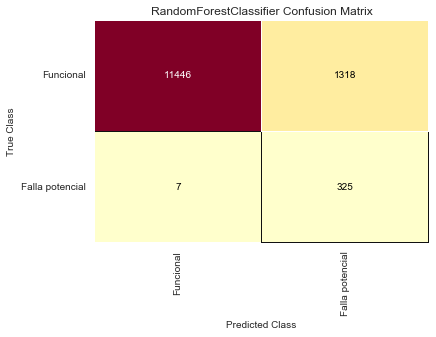



MEDIDAS DE DESEMPEÑO DEL MODELO


Exactitud - Accuracy: 0.8988240684178375
ROC AUC: 0.9378282481225435
------------------------------------------------------------
Precisión por clase: [0.99938881 0.19780889]
Sensibilidad - Recall por clase: [0.89674083 0.97891566]
F1 por clase: [0.94528637 0.32911392]
------------------------------------------------------------
F1 Macro: 0.6372001465651025
F1 Micro: 0.8988240684178374
F1 Weighted: 0.9296656259710193
------------------------------------------------------------
Sensibilidad - Recall Macro: 0.9378282481225435
Sensibilidad - Recall Micro: 0.8988240684178375
Sensibilidad - Recall Weighted: 0.8988240684178375
------------------------------------------------------------
Precisión Macro: 0.5985988463050369
Precisión Micro: 0.8988240684178375
Precisión Weighted: 0.9790677516369773
------------------------------------------------------------
Verdaderos positivos - True Positives: 325
Verdaderos negativos - True Negatives: 11446
Falsos positiv

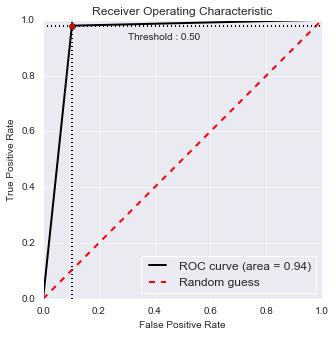

In [106]:
# métricas de desempeño - evaluación del modelo
model_evaluation(data_train, label_train, data_test, label_test, modelo1a, label_pred1a)

In [107]:
report1a = classification_report(label_test, label_pred1a, output_dict=True)
df1a = pd.DataFrame(report1a).transpose()
df1a.to_excel(writer, sheet_name='Random Forest Grid')
writer.save()

## Clasificador Gausiano Naive Bayes

In [108]:
modelo2 = GaussianNB()
modelo2.fit(data_train, label_train);
label_pred2 = modelo2.predict(data_test)



MATRIZ DE CONFUSION




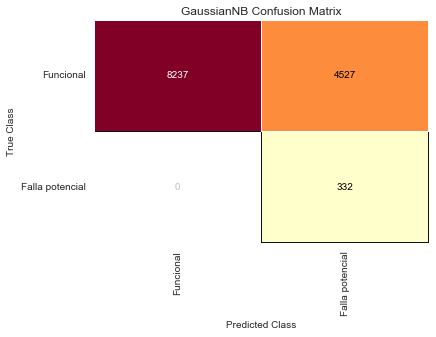



MEDIDAS DE DESEMPEÑO DEL MODELO


Exactitud - Accuracy: 0.6543219303604154
ROC AUC: 0.8226653086806643
------------------------------------------------------------
Precisión por clase: [1.         0.06832682]
Sensibilidad - Recall por clase: [0.64533062 1.        ]
F1 por clase: [0.78443884 0.1279137 ]
------------------------------------------------------------
F1 Macro: 0.45617626651439325
F1 Micro: 0.6543219303604154
F1 Weighted: 0.7677951018001297
------------------------------------------------------------
Sensibilidad - Recall Macro: 0.8226653086806643
Sensibilidad - Recall Micro: 0.6543219303604154
Sensibilidad - Recall Weighted: 0.6543219303604154
------------------------------------------------------------
Precisión Macro: 0.5341634081086644
Precisión Micro: 0.6543219303604154
Precisión Weighted: 0.9763809180653752
------------------------------------------------------------
Verdaderos positivos - True Positives: 332
Verdaderos negativos - True Negatives: 8237
Falsos positiv

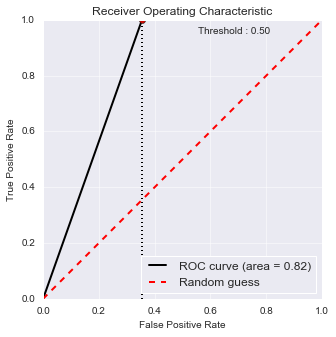

In [109]:
# métricas de desempeño - evaluación del modelo
model_evaluation(data_train, label_train, data_test, label_test, modelo2, label_pred2)

In [110]:
report2 = classification_report(label_test, label_pred2, output_dict=True)
df2 = pd.DataFrame(report2).transpose()
df2.to_excel(writer, sheet_name='Naive Bayes')
writer.save()

## Clasificacion con Support Vector Machine

In [111]:
modelo3 = SVC(kernel='rbf', random_state=0)
modelo3.fit(data_train, label_train)

C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)

In [112]:
label_pred3 = modelo3.predict(data_test)



MATRIZ DE CONFUSION




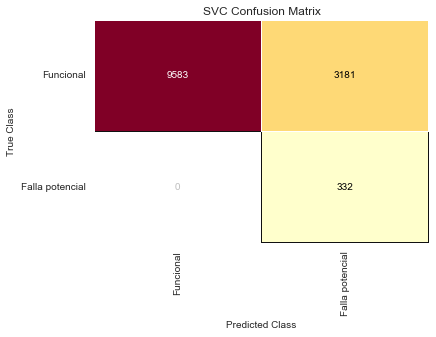



MEDIDAS DE DESEMPEÑO DEL MODELO


Exactitud - Accuracy: 0.7571014050091631
ROC AUC: 0.8753917267314322
------------------------------------------------------------
Precisión por clase: [1.         0.09450612]
Sensibilidad - Recall por clase: [0.75078345 1.        ]
F1 por clase: [0.85765427 0.17269181]
------------------------------------------------------------
F1 Macro: 0.5151730394045497
F1 Micro: 0.757101405009163
F1 Weighted: 0.8402896150392436
------------------------------------------------------------
Sensibilidad - Recall Macro: 0.8753917267314322
Sensibilidad - Recall Micro: 0.7571014050091631
Sensibilidad - Recall Weighted: 0.7571014050091631
------------------------------------------------------------
Precisión Macro: 0.5472530600626245
Precisión Micro: 0.7571014050091631
Precisión Weighted: 0.9770445962035417
------------------------------------------------------------
Verdaderos positivos - True Positives: 332
Verdaderos negativos - True Negatives: 9583
Falsos positivos

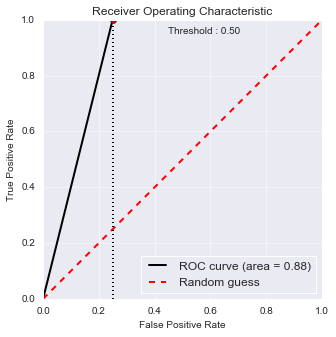

In [113]:
# métricas de desempeño - evaluación del modelo
model_evaluation(data_train, label_train, data_test, label_test, modelo3, label_pred3)

In [114]:
report3 = classification_report(label_test, label_pred3, output_dict=True)
df3 = pd.DataFrame(report3).transpose()
df3.to_excel(writer, sheet_name='SVC')
writer.save()

## Clasificacion Linear SVC

In [115]:
modelo4 = LinearSVC(random_state=0, max_iter=10000)
modelo4.fit(data_train, label_train);
label_pred4 = modelo4.predict(data_test)



MATRIZ DE CONFUSION




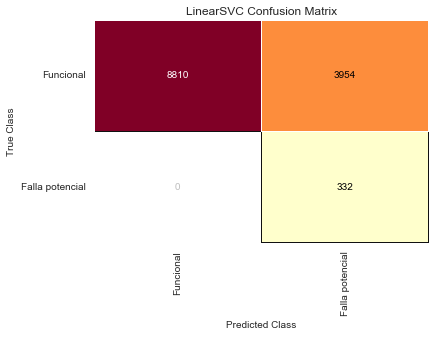



MEDIDAS DE DESEMPEÑO DEL MODELO


Exactitud - Accuracy: 0.6980757483200978
ROC AUC: 0.8451112503917267
------------------------------------------------------------
Precisión por clase: [1.        0.0774615]
Sensibilidad - Recall por clase: [0.6902225 1.       ]
F1 por clase: [0.81672383 0.14378519]
------------------------------------------------------------
F1 Macro: 0.48025451131908414
F1 Micro: 0.6980757483200978
F1 Weighted: 0.7996639968577256
------------------------------------------------------------
Sensibilidad - Recall Macro: 0.8451112503917267
Sensibilidad - Recall Micro: 0.6980757483200978
Sensibilidad - Recall Weighted: 0.6980757483200978
------------------------------------------------------------
Precisión Macro: 0.5387307512832478
Precisión Micro: 0.6980757483200978
Precisión Weighted: 0.9766124938036099
------------------------------------------------------------
Verdaderos positivos - True Positives: 332
Verdaderos negativos - True Negatives: 8810
Falsos positivos -

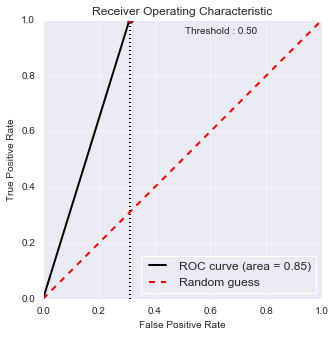

In [116]:
# métricas de desempeño - evaluación del modelo
model_evaluation(data_train, label_train, data_test, label_test, modelo4, label_pred4)

In [117]:
report4 = classification_report(label_test, label_pred4, output_dict=True)
df4 = pd.DataFrame(report4).transpose()
df4.to_excel(writer, sheet_name='linearSVC')
writer.save()

## k-NN KNeighborsClassifier con grid search

In [118]:
model = KNeighborsClassifier()
parameters= {'n_neighbors': np.arange(1, 100, 2)            
}

acc_scorer=make_scorer(accuracy_score)

grid = GridSearchCV(model, param_grid=parameters, cv=5, verbose=2, scoring=acc_scorer)
%time grid.fit(data_train, label_train)


Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] n_neighbors=1 ...................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................................... n_neighbors=1, total=   1.6s
[CV] n_neighbors=1 ...................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s remaining:    0.0s


[CV] .................................... n_neighbors=1, total=   1.5s
[CV] n_neighbors=1 ...................................................
[CV] .................................... n_neighbors=1, total=   1.5s
[CV] n_neighbors=1 ...................................................
[CV] .................................... n_neighbors=1, total=   1.5s
[CV] n_neighbors=1 ...................................................
[CV] .................................... n_neighbors=1, total=   1.4s
[CV] n_neighbors=3 ...................................................
[CV] .................................... n_neighbors=3, total=   1.8s
[CV] n_neighbors=3 ...................................................
[CV] .................................... n_neighbors=3, total=   1.9s
[CV] n_neighbors=3 ...................................................
[CV] .................................... n_neighbors=3, total=   1.7s
[CV] n_neighbors=3 ...................................................
[CV] .

[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed: 13.9min finished


Wall time: 13min 54s


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67,
       69, 71, 73, 75, 77, 79, 81, 83, 85, 87, 89, 91, 93, 95, 97, 99])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=make_scorer(accuracy_score), verbose=2)

In [119]:
print(grid.best_params_)
print(grid.best_score_)
print(grid.best_index_)

{'n_neighbors': 1}
0.9811476812503566
0


In [120]:
modelo5= grid.best_estimator_
modelo5.fit(data_train, label_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [121]:
label_pred5 = modelo5.predict(data_test)



MATRIZ DE CONFUSION




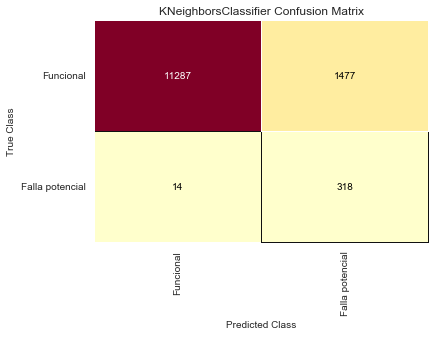



MEDIDAS DE DESEMPEÑO DEL MODELO


Exactitud - Accuracy: 0.8861484422724496
ROC AUC: 0.9210576244180734
------------------------------------------------------------
Precisión por clase: [0.99876117 0.17715877]
Sensibilidad - Recall por clase: [0.88428392 0.95783133]
F1 por clase: [0.9380428  0.29901269]
------------------------------------------------------------
F1 Macro: 0.618527747341547
F1 Micro: 0.8861484422724496
F1 Weighted: 0.9218425872887601
------------------------------------------------------------
Sensibilidad - Recall Macro: 0.9210576244180735
Sensibilidad - Recall Micro: 0.8861484422724496
Sensibilidad - Recall Weighted: 0.8861484422724496
------------------------------------------------------------
Precisión Macro: 0.5879599729754977
Precisión Micro: 0.8861484422724496
Precisión Weighted: 0.9779325219234997
------------------------------------------------------------
Verdaderos positivos - True Positives: 318
Verdaderos negativos - True Negatives: 11287
Falsos positivo

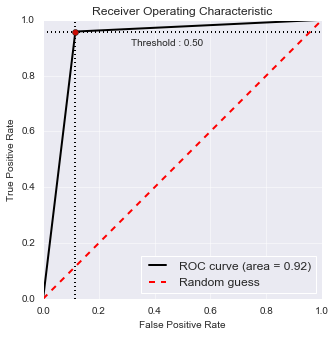

In [122]:
# métricas de desempeño - evaluación del modelo
model_evaluation(data_train, label_train, data_test, label_test, modelo5, label_pred5)

In [123]:
report5 = classification_report(label_test, label_pred5, output_dict=True)
df5 = pd.DataFrame(report5).transpose()
df5.to_excel(writer, sheet_name='KNN')
writer.save()

## Clasificacion con arbol de decision con Grid Search

In [124]:
model = tree.DecisionTreeClassifier()
depths = np.arange(1,20)
parameters= {'max_depth' : depths,
             'min_samples_leaf' : [1, 5, 10, 20, 50, 100],
             'criterion': ['entropy', 'gini'],
}

acc_scorer=make_scorer(accuracy_score)

grid = GridSearchCV(model, param_grid=parameters, cv=5, verbose=2, scoring=acc_scorer)
%time grid.fit(data_train, label_train)

Fitting 5 folds for each of 228 candidates, totalling 1140 fits
[CV] criterion=entropy, max_depth=1, min_samples_leaf=1 ..............
[CV]  criterion=entropy, max_depth=1, min_samples_leaf=1, total=   0.0s
[CV] criterion=entropy, max_depth=1, min_samples_leaf=1 ..............
[CV]  criterion=entropy, max_depth=1, min_samples_leaf=1, total=   0.0s
[CV] criterion=entropy, max_depth=1, min_samples_leaf=1 ..............
[CV]  criterion=entropy, max_depth=1, min_samples_leaf=1, total=   0.0s
[CV] criterion=entropy, max_depth=1, min_samples_leaf=1 ..............
[CV]  criterion=entropy, max_depth=1, min_samples_leaf=1, total=   0.0s
[CV] criterion=entropy, max_depth=1, min_samples_leaf=1 ..............
[CV]  criterion=entropy, max_depth=1, min_samples_leaf=1, total=   0.0s
[CV] criterion=entropy, max_depth=1, min_samples_leaf=5 ..............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  criterion=entropy, max_depth=1, min_samples_leaf=5, total=   0.0s
[CV] criterion=entropy, max_depth=1, min_samples_leaf=5 ..............
[CV]  criterion=entropy, max_depth=1, min_samples_leaf=5, total=   0.0s
[CV] criterion=entropy, max_depth=1, min_samples_leaf=5 ..............
[CV]  criterion=entropy, max_depth=1, min_samples_leaf=5, total=   0.0s
[CV] criterion=entropy, max_depth=1, min_samples_leaf=5 ..............
[CV]  criterion=entropy, max_depth=1, min_samples_leaf=5, total=   0.0s
[CV] criterion=entropy, max_depth=1, min_samples_leaf=5 ..............
[CV]  criterion=entropy, max_depth=1, min_samples_leaf=5, total=   0.0s
[CV] criterion=entropy, max_depth=1, min_samples_leaf=10 .............
[CV]  criterion=entropy, max_depth=1, min_samples_leaf=10, total=   0.0s
[CV] criterion=entropy, max_depth=1, min_samples_leaf=10 .............
[CV]  criterion=entropy, max_depth=1, min_samples_leaf=10, total=   0.0s
[CV] criterion=entropy, max_depth=1, min_samples_leaf=10 ...........

[Parallel(n_jobs=1)]: Done 1140 out of 1140 | elapsed:  2.5min finished


Wall time: 2min 32s


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8, 

In [125]:
print(grid.best_params_)
print(grid.best_score_)
print(grid.best_index_)

{'criterion': 'entropy', 'max_depth': 19, 'min_samples_leaf': 1}
0.9801779704523416
108


In [126]:
modelo6= grid.best_estimator_
modelo6.fit(data_train, label_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=19,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [127]:
label_pred6 = modelo6.predict(data_test)



MATRIZ DE CONFUSION




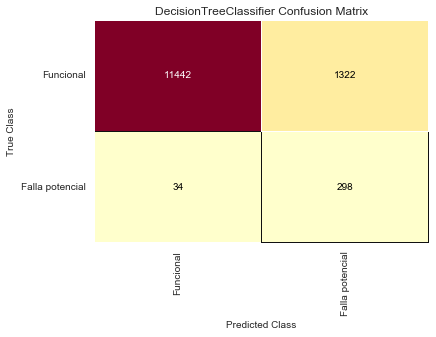



MEDIDAS DE DESEMPEÑO DEL MODELO


Exactitud - Accuracy: 0.8964569334147832
ROC AUC: 0.897008906827561
------------------------------------------------------------
Precisión por clase: [0.9970373  0.18395062]
Sensibilidad - Recall por clase: [0.89642745 0.89759036]
F1 por clase: [0.94405941 0.30532787]
------------------------------------------------------------
F1 Macro: 0.6246936373965265
F1 Micro: 0.896456933414783
F1 Weighted: 0.9278667615977976
------------------------------------------------------------
Sensibilidad - Recall Macro: 0.8970089068275608
Sensibilidad - Recall Micro: 0.8964569334147832
Sensibilidad - Recall Weighted: 0.8964569334147832
------------------------------------------------------------
Precisión Macro: 0.5904939562543838
Precisión Micro: 0.8964569334147832
Precisión Weighted: 0.9764245297180694
------------------------------------------------------------
Verdaderos positivos - True Positives: 298
Verdaderos negativos - True Negatives: 11442
Falsos positivos

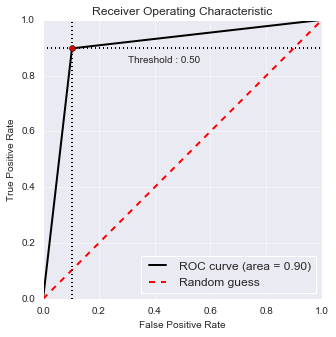

In [128]:
# métricas de desempeño - evaluación del modelo
model_evaluation(data_train, label_train, data_test, label_test, modelo6, label_pred6)

In [129]:
report6 = classification_report(label_test, label_pred6, output_dict=True)
df6 = pd.DataFrame(report6).transpose()
df6.to_excel(writer, sheet_name='Tree')
writer.save()

## Clasificacion por regresion logistica con Grid Search

In [130]:
model = LogisticRegression(solver='liblinear')
c = np.arange(1,20)
parameters= {'C' : c,}

acc_scorer=make_scorer(accuracy_score)

grid = GridSearchCV(model, param_grid=parameters, cv=5, verbose=2, scoring=acc_scorer)
%time grid.fit(data_train, label_train)

Fitting 5 folds for each of 19 candidates, totalling 95 fits
[CV] C=1 .............................................................
[CV] .............................................. C=1, total=   0.1s
[CV] C=1 .............................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] .............................................. C=1, total=   0.1s
[CV] C=1 .............................................................
[CV] .............................................. C=1, total=   0.1s
[CV] C=1 .............................................................
[CV] .............................................. C=1, total=   0.1s
[CV] C=1 .............................................................
[CV] .............................................. C=1, total=   0.1s
[CV] C=2 .............................................................
[CV] .............................................. C=2, total=   0.1s
[CV] C=2 .............................................................
[CV] .............................................. C=2, total=   0.1s
[CV] C=2 .............................................................
[CV] .............................................. C=2, total=   0.1s
[CV] C=2 .............................................................
[CV] .

[Parallel(n_jobs=1)]: Done  95 out of  95 | elapsed:   13.2s finished


Wall time: 13.5 s


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='liblinear',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=make_scorer(accuracy_score), verbose=2)

In [131]:
print(grid.best_params_)
print(grid.best_score_)
print(grid.best_index_)

{'C': 11}
0.9433860019394216
10


In [132]:
modelo7= grid.best_estimator_
modelo7.fit(data_train, label_train)

LogisticRegression(C=11, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [133]:
label_pred7 = modelo7.predict(data_test)



MATRIZ DE CONFUSION




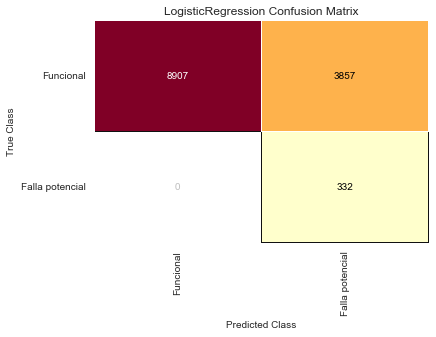



MEDIDAS DE DESEMPEÑO DEL MODELO


Exactitud - Accuracy: 0.7054825901038485
ROC AUC: 0.8489109996866187
------------------------------------------------------------
Precisión por clase: [1.         0.07925519]
Sensibilidad - Recall por clase: [0.697822 1.      ]
F1 por clase: [0.82202021 0.14687016]
------------------------------------------------------------
F1 Macro: 0.48444518640552425
F1 Micro: 0.7054825901038485
F1 Weighted: 0.8049043120938703
------------------------------------------------------------
Sensibilidad - Recall Macro: 0.8489109996866187
Sensibilidad - Recall Micro: 0.7054825901038485
Sensibilidad - Recall Weighted: 0.7054825901038485
------------------------------------------------------------
Precisión Macro: 0.5396275960849845
Precisión Micro: 0.7054825901038485
Precisión Weighted: 0.976657966081279
------------------------------------------------------------
Verdaderos positivos - True Positives: 332
Verdaderos negativos - True Negatives: 8907
Falsos positivos - 

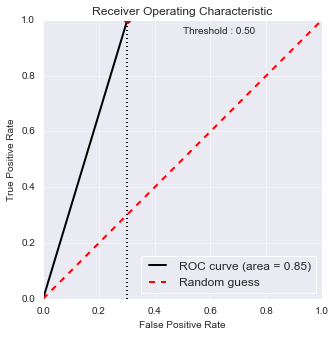

In [134]:
# métricas de desempeño - evaluación del modelo
model_evaluation(data_train, label_train, data_test, label_test, modelo7, label_pred7)

In [135]:
report7 = classification_report(label_test, label_pred7, output_dict=True)
df7 = pd.DataFrame(report7).transpose()
df7.to_excel(writer, sheet_name='LogisticR')
writer.save()

## Clasificacion con red neuronal MLP

In [136]:
modelo8= MLPClassifier(random_state=0)
modelo8.fit(data_train, label_train);
label_pred8 = modelo8.predict(data_test)


C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)




MATRIZ DE CONFUSION




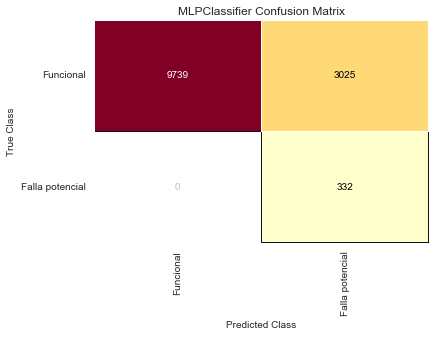



MEDIDAS DE DESEMPEÑO DEL MODELO


Exactitud - Accuracy: 0.7690134392180819
ROC AUC: 0.8815026637417738
------------------------------------------------------------
Precisión por clase: [1.         0.09889783]
Sensibilidad - Recall por clase: [0.76300533 1.        ]
F1 por clase: [0.86557348 0.17999458]
------------------------------------------------------------
F1 Macro: 0.5227840287841142
F1 Micro: 0.7690134392180817
F1 Weighted: 0.8481931954169498
------------------------------------------------------------
Sensibilidad - Recall Macro: 0.8815026637417738
Sensibilidad - Recall Micro: 0.7690134392180819
Sensibilidad - Recall Weighted: 0.7690134392180819
------------------------------------------------------------
Precisión Macro: 0.5494489127196902
Precisión Micro: 0.7690134392180819
Precisión Weighted: 0.9771559314329471
------------------------------------------------------------
Verdaderos positivos - True Positives: 332
Verdaderos negativos - True Negatives: 9739
Falsos positivo

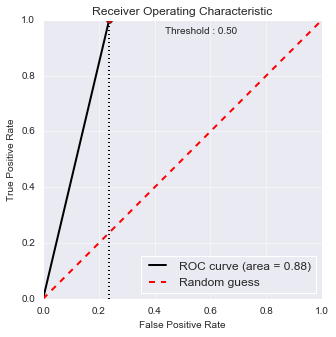

In [137]:
# model_evaluation(data_train, label_train, data_test, label_test, modelo, label_pred):
model_evaluation(data_train, label_train, data_test, label_test, modelo8, label_pred8)

In [138]:
report8 = classification_report(label_test, label_pred8, output_dict=True)
df8 = pd.DataFrame(report8).transpose()
df8.to_excel(writer, sheet_name='MLP')
writer.save()

## Red neronal MLP con grid search

In [139]:
model = MLPClassifier(random_state=0)

parameters= {'learning_rate':["constant", "invscaling", "adaptive"],
             'hidden_layer_sizes':[(8),(2,4),(1,8,1),(1,1,1),(2,8,2),(4,16,4), (1,2,1)],
             'activation': ["identity","logistic", "relu", "tanh"],
             'solver': ["lbfgs", "sgd", "adam"]
}

acc_scorer=make_scorer(accuracy_score)

grid = GridSearchCV(model, param_grid=parameters, cv=2, verbose=2, scoring=acc_scorer)
%time grid.fit(data_train, label_train)


Fitting 2 folds for each of 252 candidates, totalling 504 fits
[CV] activation=identity, hidden_layer_sizes=8, learning_rate=constant, solver=lbfgs 
[CV]  activation=identity, hidden_layer_sizes=8, learning_rate=constant, solver=lbfgs, total=   0.2s
[CV] activation=identity, hidden_layer_sizes=8, learning_rate=constant, solver=lbfgs 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  activation=identity, hidden_layer_sizes=8, learning_rate=constant, solver=lbfgs, total=   0.2s
[CV] activation=identity, hidden_layer_sizes=8, learning_rate=constant, solver=sgd 
[CV]  activation=identity, hidden_layer_sizes=8, learning_rate=constant, solver=sgd, total=   1.6s
[CV] activation=identity, hidden_layer_sizes=8, learning_rate=constant, solver=sgd 
[CV]  activation=identity, hidden_layer_sizes=8, learning_rate=constant, solver=sgd, total=   2.0s
[CV] activation=identity, hidden_layer_sizes=8, learning_rate=constant, solver=adam 
[CV]  activation=identity, hidden_layer_sizes=8, learning_rate=constant, solver=adam, total=   1.6s
[CV] activation=identity, hidden_layer_sizes=8, learning_rate=constant, solver=adam 
[CV]  activation=identity, hidden_layer_sizes=8, learning_rate=constant, solver=adam, total=   1.3s
[CV] activation=identity, hidden_layer_sizes=8, learning_rate=invscaling, solver=lbfgs 
[CV]  activation=identity, hidden_layer_sizes=8, learning_rate=invscaling, 

C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=identity, hidden_layer_sizes=(1, 1, 1), learning_rate=adaptive, solver=sgd, total=   3.5s
[CV] activation=identity, hidden_layer_sizes=(1, 1, 1), learning_rate=adaptive, solver=adam 
[CV]  activation=identity, hidden_layer_sizes=(1, 1, 1), learning_rate=adaptive, solver=adam, total=   2.5s
[CV] activation=identity, hidden_layer_sizes=(1, 1, 1), learning_rate=adaptive, solver=adam 
[CV]  activation=identity, hidden_layer_sizes=(1, 1, 1), learning_rate=adaptive, solver=adam, total=   2.2s
[CV] activation=identity, hidden_layer_sizes=(2, 8, 2), learning_rate=constant, solver=lbfgs 
[CV]  activation=identity, hidden_layer_sizes=(2, 8, 2), learning_rate=constant, solver=lbfgs, total=   0.0s
[CV] activation=identity, hidden_layer_sizes=(2, 8, 2), learning_rate=constant, solver=lbfgs 
[CV]  activation=identity, hidden_layer_sizes=(2, 8, 2), learning_rate=constant, solver=lbfgs, total=   0.0s
[CV] activation=identity, hidden_layer_sizes=(2, 8, 2), learning_rate=constant, solve

C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=identity, hidden_layer_sizes=(4, 16, 4), learning_rate=adaptive, solver=sgd, total=   5.3s
[CV] activation=identity, hidden_layer_sizes=(4, 16, 4), learning_rate=adaptive, solver=sgd 
[CV]  activation=identity, hidden_layer_sizes=(4, 16, 4), learning_rate=adaptive, solver=sgd, total=   4.9s
[CV] activation=identity, hidden_layer_sizes=(4, 16, 4), learning_rate=adaptive, solver=adam 
[CV]  activation=identity, hidden_layer_sizes=(4, 16, 4), learning_rate=adaptive, solver=adam, total=   2.2s
[CV] activation=identity, hidden_layer_sizes=(4, 16, 4), learning_rate=adaptive, solver=adam 
[CV]  activation=identity, hidden_layer_sizes=(4, 16, 4), learning_rate=adaptive, solver=adam, total=   1.8s
[CV] activation=identity, hidden_layer_sizes=(1, 2, 1), learning_rate=constant, solver=lbfgs 
[CV]  activation=identity, hidden_layer_sizes=(1, 2, 1), learning_rate=constant, solver=lbfgs, total=   0.1s
[CV] activation=identity, hidden_layer_sizes=(1, 2, 1), learning_rate=constant, so

C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=identity, hidden_layer_sizes=(1, 2, 1), learning_rate=adaptive, solver=sgd, total=   4.1s
[CV] activation=identity, hidden_layer_sizes=(1, 2, 1), learning_rate=adaptive, solver=sgd 
[CV]  activation=identity, hidden_layer_sizes=(1, 2, 1), learning_rate=adaptive, solver=sgd, total=   3.9s
[CV] activation=identity, hidden_layer_sizes=(1, 2, 1), learning_rate=adaptive, solver=adam 
[CV]  activation=identity, hidden_layer_sizes=(1, 2, 1), learning_rate=adaptive, solver=adam, total=   1.3s
[CV] activation=identity, hidden_layer_sizes=(1, 2, 1), learning_rate=adaptive, solver=adam 
[CV]  activation=identity, hidden_layer_sizes=(1, 2, 1), learning_rate=adaptive, solver=adam, total=   2.3s
[CV] activation=logistic, hidden_layer_sizes=8, learning_rate=constant, solver=lbfgs 
[CV]  activation=logistic, hidden_layer_sizes=8, learning_rate=constant, solver=lbfgs, total=   1.0s
[CV] activation=logistic, hidden_layer_sizes=8, learning_rate=constant, solver=lbfgs 
[CV]  activation=lo

C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=8, learning_rate=constant, solver=sgd, total=   3.6s
[CV] activation=logistic, hidden_layer_sizes=8, learning_rate=constant, solver=sgd 


C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=8, learning_rate=constant, solver=sgd, total=   3.6s
[CV] activation=logistic, hidden_layer_sizes=8, learning_rate=constant, solver=adam 
[CV]  activation=logistic, hidden_layer_sizes=8, learning_rate=constant, solver=adam, total=   2.0s
[CV] activation=logistic, hidden_layer_sizes=8, learning_rate=constant, solver=adam 
[CV]  activation=logistic, hidden_layer_sizes=8, learning_rate=constant, solver=adam, total=   2.0s
[CV] activation=logistic, hidden_layer_sizes=8, learning_rate=invscaling, solver=lbfgs 
[CV]  activation=logistic, hidden_layer_sizes=8, learning_rate=invscaling, solver=lbfgs, total=   0.9s
[CV] activation=logistic, hidden_layer_sizes=8, learning_rate=invscaling, solver=lbfgs 
[CV]  activation=logistic, hidden_layer_sizes=8, learning_rate=invscaling, solver=lbfgs, total=   0.9s
[CV] activation=logistic, hidden_layer_sizes=8, learning_rate=invscaling, solver=sgd 
[CV]  activation=logistic, hidden_layer_sizes=8, learning_rate=

C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=8, learning_rate=adaptive, solver=sgd, total=   3.5s
[CV] activation=logistic, hidden_layer_sizes=8, learning_rate=adaptive, solver=sgd 


C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=8, learning_rate=adaptive, solver=sgd, total=   3.5s
[CV] activation=logistic, hidden_layer_sizes=8, learning_rate=adaptive, solver=adam 
[CV]  activation=logistic, hidden_layer_sizes=8, learning_rate=adaptive, solver=adam, total=   2.0s
[CV] activation=logistic, hidden_layer_sizes=8, learning_rate=adaptive, solver=adam 
[CV]  activation=logistic, hidden_layer_sizes=8, learning_rate=adaptive, solver=adam, total=   2.0s
[CV] activation=logistic, hidden_layer_sizes=(2, 4), learning_rate=constant, solver=lbfgs 
[CV]  activation=logistic, hidden_layer_sizes=(2, 4), learning_rate=constant, solver=lbfgs, total=   0.4s
[CV] activation=logistic, hidden_layer_sizes=(2, 4), learning_rate=constant, solver=lbfgs 
[CV]  activation=logistic, hidden_layer_sizes=(2, 4), learning_rate=constant, solver=lbfgs, total=   0.4s
[CV] activation=logistic, hidden_layer_sizes=(2, 4), learning_rate=constant, solver=sgd 
[CV]  activation=logistic, hidden_layer_sizes=(2

C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=(1, 8, 1), learning_rate=constant, solver=adam, total=   6.0s
[CV] activation=logistic, hidden_layer_sizes=(1, 8, 1), learning_rate=constant, solver=adam 


C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=(1, 8, 1), learning_rate=constant, solver=adam, total=   6.0s
[CV] activation=logistic, hidden_layer_sizes=(1, 8, 1), learning_rate=invscaling, solver=lbfgs 
[CV]  activation=logistic, hidden_layer_sizes=(1, 8, 1), learning_rate=invscaling, solver=lbfgs, total=   0.1s
[CV] activation=logistic, hidden_layer_sizes=(1, 8, 1), learning_rate=invscaling, solver=lbfgs 
[CV]  activation=logistic, hidden_layer_sizes=(1, 8, 1), learning_rate=invscaling, solver=lbfgs, total=   0.1s
[CV] activation=logistic, hidden_layer_sizes=(1, 8, 1), learning_rate=invscaling, solver=sgd 
[CV]  activation=logistic, hidden_layer_sizes=(1, 8, 1), learning_rate=invscaling, solver=sgd, total=   0.3s
[CV] activation=logistic, hidden_layer_sizes=(1, 8, 1), learning_rate=invscaling, solver=sgd 
[CV]  activation=logistic, hidden_layer_sizes=(1, 8, 1), learning_rate=invscaling, solver=sgd, total=   0.4s
[CV] activation=logistic, hidden_layer_sizes=(1, 8, 1), learning_rate=in

C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=(1, 8, 1), learning_rate=invscaling, solver=adam, total=   6.1s
[CV] activation=logistic, hidden_layer_sizes=(1, 8, 1), learning_rate=invscaling, solver=adam 


C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=(1, 8, 1), learning_rate=invscaling, solver=adam, total=   6.2s
[CV] activation=logistic, hidden_layer_sizes=(1, 8, 1), learning_rate=adaptive, solver=lbfgs 
[CV]  activation=logistic, hidden_layer_sizes=(1, 8, 1), learning_rate=adaptive, solver=lbfgs, total=   0.1s
[CV] activation=logistic, hidden_layer_sizes=(1, 8, 1), learning_rate=adaptive, solver=lbfgs 
[CV]  activation=logistic, hidden_layer_sizes=(1, 8, 1), learning_rate=adaptive, solver=lbfgs, total=   0.1s
[CV] activation=logistic, hidden_layer_sizes=(1, 8, 1), learning_rate=adaptive, solver=sgd 
[CV]  activation=logistic, hidden_layer_sizes=(1, 8, 1), learning_rate=adaptive, solver=sgd, total=   1.9s
[CV] activation=logistic, hidden_layer_sizes=(1, 8, 1), learning_rate=adaptive, solver=sgd 
[CV]  activation=logistic, hidden_layer_sizes=(1, 8, 1), learning_rate=adaptive, solver=sgd, total=   1.8s
[CV] activation=logistic, hidden_layer_sizes=(1, 8, 1), learning_rate=adaptive, solver

C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=(1, 8, 1), learning_rate=adaptive, solver=adam, total=   6.2s
[CV] activation=logistic, hidden_layer_sizes=(1, 8, 1), learning_rate=adaptive, solver=adam 


C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=(1, 8, 1), learning_rate=adaptive, solver=adam, total=   6.1s
[CV] activation=logistic, hidden_layer_sizes=(1, 1, 1), learning_rate=constant, solver=lbfgs 
[CV]  activation=logistic, hidden_layer_sizes=(1, 1, 1), learning_rate=constant, solver=lbfgs, total=   0.0s
[CV] activation=logistic, hidden_layer_sizes=(1, 1, 1), learning_rate=constant, solver=lbfgs 
[CV]  activation=logistic, hidden_layer_sizes=(1, 1, 1), learning_rate=constant, solver=lbfgs, total=   0.3s
[CV] activation=logistic, hidden_layer_sizes=(1, 1, 1), learning_rate=constant, solver=sgd 
[CV]  activation=logistic, hidden_layer_sizes=(1, 1, 1), learning_rate=constant, solver=sgd, total=   0.5s
[CV] activation=logistic, hidden_layer_sizes=(1, 1, 1), learning_rate=constant, solver=sgd 
[CV]  activation=logistic, hidden_layer_sizes=(1, 1, 1), learning_rate=constant, solver=sgd, total=   0.5s
[CV] activation=logistic, hidden_layer_sizes=(1, 1, 1), learning_rate=constant, solver=a

C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=(1, 1, 1), learning_rate=constant, solver=adam, total=   4.7s
[CV] activation=logistic, hidden_layer_sizes=(1, 1, 1), learning_rate=constant, solver=adam 


C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=(1, 1, 1), learning_rate=constant, solver=adam, total=   4.7s
[CV] activation=logistic, hidden_layer_sizes=(1, 1, 1), learning_rate=invscaling, solver=lbfgs 
[CV]  activation=logistic, hidden_layer_sizes=(1, 1, 1), learning_rate=invscaling, solver=lbfgs, total=   0.0s
[CV] activation=logistic, hidden_layer_sizes=(1, 1, 1), learning_rate=invscaling, solver=lbfgs 
[CV]  activation=logistic, hidden_layer_sizes=(1, 1, 1), learning_rate=invscaling, solver=lbfgs, total=   0.4s
[CV] activation=logistic, hidden_layer_sizes=(1, 1, 1), learning_rate=invscaling, solver=sgd 
[CV]  activation=logistic, hidden_layer_sizes=(1, 1, 1), learning_rate=invscaling, solver=sgd, total=   0.3s
[CV] activation=logistic, hidden_layer_sizes=(1, 1, 1), learning_rate=invscaling, solver=sgd 
[CV]  activation=logistic, hidden_layer_sizes=(1, 1, 1), learning_rate=invscaling, solver=sgd, total=   0.3s
[CV] activation=logistic, hidden_layer_sizes=(1, 1, 1), learning_rate=in

C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=(1, 1, 1), learning_rate=invscaling, solver=adam, total=   4.6s
[CV] activation=logistic, hidden_layer_sizes=(1, 1, 1), learning_rate=invscaling, solver=adam 


C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=(1, 1, 1), learning_rate=invscaling, solver=adam, total=   4.6s
[CV] activation=logistic, hidden_layer_sizes=(1, 1, 1), learning_rate=adaptive, solver=lbfgs 
[CV]  activation=logistic, hidden_layer_sizes=(1, 1, 1), learning_rate=adaptive, solver=lbfgs, total=   0.0s
[CV] activation=logistic, hidden_layer_sizes=(1, 1, 1), learning_rate=adaptive, solver=lbfgs 
[CV]  activation=logistic, hidden_layer_sizes=(1, 1, 1), learning_rate=adaptive, solver=lbfgs, total=   0.3s
[CV] activation=logistic, hidden_layer_sizes=(1, 1, 1), learning_rate=adaptive, solver=sgd 
[CV]  activation=logistic, hidden_layer_sizes=(1, 1, 1), learning_rate=adaptive, solver=sgd, total=   1.5s
[CV] activation=logistic, hidden_layer_sizes=(1, 1, 1), learning_rate=adaptive, solver=sgd 
[CV]  activation=logistic, hidden_layer_sizes=(1, 1, 1), learning_rate=adaptive, solver=sgd, total=   1.5s
[CV] activation=logistic, hidden_layer_sizes=(1, 1, 1), learning_rate=adaptive, solver

C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=(1, 1, 1), learning_rate=adaptive, solver=adam, total=   4.6s
[CV] activation=logistic, hidden_layer_sizes=(1, 1, 1), learning_rate=adaptive, solver=adam 


C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=(1, 1, 1), learning_rate=adaptive, solver=adam, total=   4.6s
[CV] activation=logistic, hidden_layer_sizes=(2, 8, 2), learning_rate=constant, solver=lbfgs 
[CV]  activation=logistic, hidden_layer_sizes=(2, 8, 2), learning_rate=constant, solver=lbfgs, total=   1.3s
[CV] activation=logistic, hidden_layer_sizes=(2, 8, 2), learning_rate=constant, solver=lbfgs 
[CV]  activation=logistic, hidden_layer_sizes=(2, 8, 2), learning_rate=constant, solver=lbfgs, total=   1.3s
[CV] activation=logistic, hidden_layer_sizes=(2, 8, 2), learning_rate=constant, solver=sgd 
[CV]  activation=logistic, hidden_layer_sizes=(2, 8, 2), learning_rate=constant, solver=sgd, total=   0.6s
[CV] activation=logistic, hidden_layer_sizes=(2, 8, 2), learning_rate=constant, solver=sgd 
[CV]  activation=logistic, hidden_layer_sizes=(2, 8, 2), learning_rate=constant, solver=sgd, total=   0.6s
[CV] activation=logistic, hidden_layer_sizes=(2, 8, 2), learning_rate=constant, solver=a

C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=(1, 2, 1), learning_rate=constant, solver=adam, total=   5.6s
[CV] activation=logistic, hidden_layer_sizes=(1, 2, 1), learning_rate=constant, solver=adam 


C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=(1, 2, 1), learning_rate=constant, solver=adam, total=   5.7s
[CV] activation=logistic, hidden_layer_sizes=(1, 2, 1), learning_rate=invscaling, solver=lbfgs 
[CV]  activation=logistic, hidden_layer_sizes=(1, 2, 1), learning_rate=invscaling, solver=lbfgs, total=   0.0s
[CV] activation=logistic, hidden_layer_sizes=(1, 2, 1), learning_rate=invscaling, solver=lbfgs 
[CV]  activation=logistic, hidden_layer_sizes=(1, 2, 1), learning_rate=invscaling, solver=lbfgs, total=   0.0s
[CV] activation=logistic, hidden_layer_sizes=(1, 2, 1), learning_rate=invscaling, solver=sgd 
[CV]  activation=logistic, hidden_layer_sizes=(1, 2, 1), learning_rate=invscaling, solver=sgd, total=   0.3s
[CV] activation=logistic, hidden_layer_sizes=(1, 2, 1), learning_rate=invscaling, solver=sgd 
[CV]  activation=logistic, hidden_layer_sizes=(1, 2, 1), learning_rate=invscaling, solver=sgd, total=   0.3s
[CV] activation=logistic, hidden_layer_sizes=(1, 2, 1), learning_rate=in

C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=(1, 2, 1), learning_rate=invscaling, solver=adam, total=   5.5s
[CV] activation=logistic, hidden_layer_sizes=(1, 2, 1), learning_rate=invscaling, solver=adam 


C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=(1, 2, 1), learning_rate=invscaling, solver=adam, total=   5.7s
[CV] activation=logistic, hidden_layer_sizes=(1, 2, 1), learning_rate=adaptive, solver=lbfgs 
[CV]  activation=logistic, hidden_layer_sizes=(1, 2, 1), learning_rate=adaptive, solver=lbfgs, total=   0.0s
[CV] activation=logistic, hidden_layer_sizes=(1, 2, 1), learning_rate=adaptive, solver=lbfgs 
[CV]  activation=logistic, hidden_layer_sizes=(1, 2, 1), learning_rate=adaptive, solver=lbfgs, total=   0.0s
[CV] activation=logistic, hidden_layer_sizes=(1, 2, 1), learning_rate=adaptive, solver=sgd 
[CV]  activation=logistic, hidden_layer_sizes=(1, 2, 1), learning_rate=adaptive, solver=sgd, total=   1.7s
[CV] activation=logistic, hidden_layer_sizes=(1, 2, 1), learning_rate=adaptive, solver=sgd 
[CV]  activation=logistic, hidden_layer_sizes=(1, 2, 1), learning_rate=adaptive, solver=sgd, total=   1.6s
[CV] activation=logistic, hidden_layer_sizes=(1, 2, 1), learning_rate=adaptive, solver

C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=(1, 2, 1), learning_rate=adaptive, solver=adam, total=   5.5s
[CV] activation=logistic, hidden_layer_sizes=(1, 2, 1), learning_rate=adaptive, solver=adam 


C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=(1, 2, 1), learning_rate=adaptive, solver=adam, total=   5.7s
[CV] activation=relu, hidden_layer_sizes=8, learning_rate=constant, solver=lbfgs 
[CV]  activation=relu, hidden_layer_sizes=8, learning_rate=constant, solver=lbfgs, total=   0.7s
[CV] activation=relu, hidden_layer_sizes=8, learning_rate=constant, solver=lbfgs 
[CV]  activation=relu, hidden_layer_sizes=8, learning_rate=constant, solver=lbfgs, total=   0.7s
[CV] activation=relu, hidden_layer_sizes=8, learning_rate=constant, solver=sgd 
[CV]  activation=relu, hidden_layer_sizes=8, learning_rate=constant, solver=sgd, total=   1.8s
[CV] activation=relu, hidden_layer_sizes=8, learning_rate=constant, solver=sgd 
[CV]  activation=relu, hidden_layer_sizes=8, learning_rate=constant, solver=sgd, total=   1.9s
[CV] activation=relu, hidden_layer_sizes=8, learning_rate=constant, solver=adam 
[CV]  activation=relu, hidden_layer_sizes=8, learning_rate=constant, solver=adam, total=   1.7s
[CV] ac

C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, hidden_layer_sizes=(2, 8, 2), learning_rate=constant, solver=sgd, total=   5.6s
[CV] activation=relu, hidden_layer_sizes=(2, 8, 2), learning_rate=constant, solver=sgd 


C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, hidden_layer_sizes=(2, 8, 2), learning_rate=constant, solver=sgd, total=   5.7s
[CV] activation=relu, hidden_layer_sizes=(2, 8, 2), learning_rate=constant, solver=adam 
[CV]  activation=relu, hidden_layer_sizes=(2, 8, 2), learning_rate=constant, solver=adam, total=   4.7s
[CV] activation=relu, hidden_layer_sizes=(2, 8, 2), learning_rate=constant, solver=adam 
[CV]  activation=relu, hidden_layer_sizes=(2, 8, 2), learning_rate=constant, solver=adam, total=   5.0s
[CV] activation=relu, hidden_layer_sizes=(2, 8, 2), learning_rate=invscaling, solver=lbfgs 
[CV]  activation=relu, hidden_layer_sizes=(2, 8, 2), learning_rate=invscaling, solver=lbfgs, total=   1.1s
[CV] activation=relu, hidden_layer_sizes=(2, 8, 2), learning_rate=invscaling, solver=lbfgs 
[CV]  activation=relu, hidden_layer_sizes=(2, 8, 2), learning_rate=invscaling, solver=lbfgs, total=   0.9s
[CV] activation=relu, hidden_layer_sizes=(2, 8, 2), learning_rate=invscaling, solver=sgd 
[CV]  activation=relu, 

C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, hidden_layer_sizes=(2, 8, 2), learning_rate=adaptive, solver=sgd, total=   5.6s
[CV] activation=relu, hidden_layer_sizes=(2, 8, 2), learning_rate=adaptive, solver=sgd 


C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, hidden_layer_sizes=(2, 8, 2), learning_rate=adaptive, solver=sgd, total=   5.5s
[CV] activation=relu, hidden_layer_sizes=(2, 8, 2), learning_rate=adaptive, solver=adam 
[CV]  activation=relu, hidden_layer_sizes=(2, 8, 2), learning_rate=adaptive, solver=adam, total=   4.5s
[CV] activation=relu, hidden_layer_sizes=(2, 8, 2), learning_rate=adaptive, solver=adam 
[CV]  activation=relu, hidden_layer_sizes=(2, 8, 2), learning_rate=adaptive, solver=adam, total=   4.9s
[CV] activation=relu, hidden_layer_sizes=(4, 16, 4), learning_rate=constant, solver=lbfgs 
[CV]  activation=relu, hidden_layer_sizes=(4, 16, 4), learning_rate=constant, solver=lbfgs, total=   1.6s
[CV] activation=relu, hidden_layer_sizes=(4, 16, 4), learning_rate=constant, solver=lbfgs 
[CV]  activation=relu, hidden_layer_sizes=(4, 16, 4), learning_rate=constant, solver=lbfgs, total=   0.1s
[CV] activation=relu, hidden_layer_sizes=(4, 16, 4), learning_rate=constant, solver=sgd 
[CV]  activation=relu, hidde

C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, hidden_layer_sizes=(4, 16, 4), learning_rate=constant, solver=adam, total=   8.0s
[CV] activation=relu, hidden_layer_sizes=(4, 16, 4), learning_rate=constant, solver=adam 
[CV]  activation=relu, hidden_layer_sizes=(4, 16, 4), learning_rate=constant, solver=adam, total=   5.9s
[CV] activation=relu, hidden_layer_sizes=(4, 16, 4), learning_rate=invscaling, solver=lbfgs 
[CV]  activation=relu, hidden_layer_sizes=(4, 16, 4), learning_rate=invscaling, solver=lbfgs, total=   1.6s
[CV] activation=relu, hidden_layer_sizes=(4, 16, 4), learning_rate=invscaling, solver=lbfgs 
[CV]  activation=relu, hidden_layer_sizes=(4, 16, 4), learning_rate=invscaling, solver=lbfgs, total=   0.1s
[CV] activation=relu, hidden_layer_sizes=(4, 16, 4), learning_rate=invscaling, solver=sgd 
[CV]  activation=relu, hidden_layer_sizes=(4, 16, 4), learning_rate=invscaling, solver=sgd, total=   0.4s
[CV] activation=relu, hidden_layer_sizes=(4, 16, 4), learning_rate=invscaling, solver=sgd 
[CV]  acti

C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, hidden_layer_sizes=(4, 16, 4), learning_rate=invscaling, solver=adam, total=   8.0s
[CV] activation=relu, hidden_layer_sizes=(4, 16, 4), learning_rate=invscaling, solver=adam 
[CV]  activation=relu, hidden_layer_sizes=(4, 16, 4), learning_rate=invscaling, solver=adam, total=   6.4s
[CV] activation=relu, hidden_layer_sizes=(4, 16, 4), learning_rate=adaptive, solver=lbfgs 
[CV]  activation=relu, hidden_layer_sizes=(4, 16, 4), learning_rate=adaptive, solver=lbfgs, total=   1.7s
[CV] activation=relu, hidden_layer_sizes=(4, 16, 4), learning_rate=adaptive, solver=lbfgs 
[CV]  activation=relu, hidden_layer_sizes=(4, 16, 4), learning_rate=adaptive, solver=lbfgs, total=   0.1s
[CV] activation=relu, hidden_layer_sizes=(4, 16, 4), learning_rate=adaptive, solver=sgd 
[CV]  activation=relu, hidden_layer_sizes=(4, 16, 4), learning_rate=adaptive, solver=sgd, total=   2.2s
[CV] activation=relu, hidden_layer_sizes=(4, 16, 4), learning_rate=adaptive, solver=sgd 


C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, hidden_layer_sizes=(4, 16, 4), learning_rate=adaptive, solver=sgd, total=   6.6s
[CV] activation=relu, hidden_layer_sizes=(4, 16, 4), learning_rate=adaptive, solver=adam 


C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, hidden_layer_sizes=(4, 16, 4), learning_rate=adaptive, solver=adam, total=   8.3s
[CV] activation=relu, hidden_layer_sizes=(4, 16, 4), learning_rate=adaptive, solver=adam 
[CV]  activation=relu, hidden_layer_sizes=(4, 16, 4), learning_rate=adaptive, solver=adam, total=   5.9s
[CV] activation=relu, hidden_layer_sizes=(1, 2, 1), learning_rate=constant, solver=lbfgs 
[CV]  activation=relu, hidden_layer_sizes=(1, 2, 1), learning_rate=constant, solver=lbfgs, total=   0.4s
[CV] activation=relu, hidden_layer_sizes=(1, 2, 1), learning_rate=constant, solver=lbfgs 
[CV]  activation=relu, hidden_layer_sizes=(1, 2, 1), learning_rate=constant, solver=lbfgs, total=   0.2s
[CV] activation=relu, hidden_layer_sizes=(1, 2, 1), learning_rate=constant, solver=sgd 


C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, hidden_layer_sizes=(1, 2, 1), learning_rate=constant, solver=sgd, total=   4.8s
[CV] activation=relu, hidden_layer_sizes=(1, 2, 1), learning_rate=constant, solver=sgd 


C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, hidden_layer_sizes=(1, 2, 1), learning_rate=constant, solver=sgd, total=   4.7s
[CV] activation=relu, hidden_layer_sizes=(1, 2, 1), learning_rate=constant, solver=adam 
[CV]  activation=relu, hidden_layer_sizes=(1, 2, 1), learning_rate=constant, solver=adam, total=   4.5s
[CV] activation=relu, hidden_layer_sizes=(1, 2, 1), learning_rate=constant, solver=adam 
[CV]  activation=relu, hidden_layer_sizes=(1, 2, 1), learning_rate=constant, solver=adam, total=   4.1s
[CV] activation=relu, hidden_layer_sizes=(1, 2, 1), learning_rate=invscaling, solver=lbfgs 
[CV]  activation=relu, hidden_layer_sizes=(1, 2, 1), learning_rate=invscaling, solver=lbfgs, total=   0.5s
[CV] activation=relu, hidden_layer_sizes=(1, 2, 1), learning_rate=invscaling, solver=lbfgs 
[CV]  activation=relu, hidden_layer_sizes=(1, 2, 1), learning_rate=invscaling, solver=lbfgs, total=   0.3s
[CV] activation=relu, hidden_layer_sizes=(1, 2, 1), learning_rate=invscaling, solver=sgd 
[CV]  activation=relu, 

C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, hidden_layer_sizes=(1, 2, 1), learning_rate=adaptive, solver=sgd, total=   4.8s
[CV] activation=relu, hidden_layer_sizes=(1, 2, 1), learning_rate=adaptive, solver=sgd 


C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, hidden_layer_sizes=(1, 2, 1), learning_rate=adaptive, solver=sgd, total=   4.9s
[CV] activation=relu, hidden_layer_sizes=(1, 2, 1), learning_rate=adaptive, solver=adam 
[CV]  activation=relu, hidden_layer_sizes=(1, 2, 1), learning_rate=adaptive, solver=adam, total=   4.6s
[CV] activation=relu, hidden_layer_sizes=(1, 2, 1), learning_rate=adaptive, solver=adam 
[CV]  activation=relu, hidden_layer_sizes=(1, 2, 1), learning_rate=adaptive, solver=adam, total=   4.0s
[CV] activation=tanh, hidden_layer_sizes=8, learning_rate=constant, solver=lbfgs 
[CV]  activation=tanh, hidden_layer_sizes=8, learning_rate=constant, solver=lbfgs, total=   0.9s
[CV] activation=tanh, hidden_layer_sizes=8, learning_rate=constant, solver=lbfgs 
[CV]  activation=tanh, hidden_layer_sizes=8, learning_rate=constant, solver=lbfgs, total=   0.9s
[CV] activation=tanh, hidden_layer_sizes=8, learning_rate=constant, solver=sgd 
[CV]  activation=tanh, hidden_layer_sizes=8, learning_rate=constant, solv

C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, hidden_layer_sizes=(2, 4), learning_rate=constant, solver=sgd, total=   4.3s
[CV] activation=tanh, hidden_layer_sizes=(2, 4), learning_rate=constant, solver=sgd 


C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, hidden_layer_sizes=(2, 4), learning_rate=constant, solver=sgd, total=   4.5s
[CV] activation=tanh, hidden_layer_sizes=(2, 4), learning_rate=constant, solver=adam 
[CV]  activation=tanh, hidden_layer_sizes=(2, 4), learning_rate=constant, solver=adam, total=   4.7s
[CV] activation=tanh, hidden_layer_sizes=(2, 4), learning_rate=constant, solver=adam 
[CV]  activation=tanh, hidden_layer_sizes=(2, 4), learning_rate=constant, solver=adam, total=   4.4s
[CV] activation=tanh, hidden_layer_sizes=(2, 4), learning_rate=invscaling, solver=lbfgs 
[CV]  activation=tanh, hidden_layer_sizes=(2, 4), learning_rate=invscaling, solver=lbfgs, total=   0.5s
[CV] activation=tanh, hidden_layer_sizes=(2, 4), learning_rate=invscaling, solver=lbfgs 
[CV]  activation=tanh, hidden_layer_sizes=(2, 4), learning_rate=invscaling, solver=lbfgs, total=   0.5s
[CV] activation=tanh, hidden_layer_sizes=(2, 4), learning_rate=invscaling, solver=sgd 
[CV]  activation=tanh, hidden_layer_sizes=(2, 4), lea

C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, hidden_layer_sizes=(2, 4), learning_rate=adaptive, solver=sgd, total=   4.4s
[CV] activation=tanh, hidden_layer_sizes=(2, 4), learning_rate=adaptive, solver=sgd 


C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, hidden_layer_sizes=(2, 4), learning_rate=adaptive, solver=sgd, total=   4.6s
[CV] activation=tanh, hidden_layer_sizes=(2, 4), learning_rate=adaptive, solver=adam 
[CV]  activation=tanh, hidden_layer_sizes=(2, 4), learning_rate=adaptive, solver=adam, total=   4.7s
[CV] activation=tanh, hidden_layer_sizes=(2, 4), learning_rate=adaptive, solver=adam 
[CV]  activation=tanh, hidden_layer_sizes=(2, 4), learning_rate=adaptive, solver=adam, total=   4.3s
[CV] activation=tanh, hidden_layer_sizes=(1, 8, 1), learning_rate=constant, solver=lbfgs 
[CV]  activation=tanh, hidden_layer_sizes=(1, 8, 1), learning_rate=constant, solver=lbfgs, total=   0.1s
[CV] activation=tanh, hidden_layer_sizes=(1, 8, 1), learning_rate=constant, solver=lbfgs 
[CV]  activation=tanh, hidden_layer_sizes=(1, 8, 1), learning_rate=constant, solver=lbfgs, total=   0.1s
[CV] activation=tanh, hidden_layer_sizes=(1, 8, 1), learning_rate=constant, solver=sgd 


C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, hidden_layer_sizes=(1, 8, 1), learning_rate=constant, solver=sgd, total=   5.3s
[CV] activation=tanh, hidden_layer_sizes=(1, 8, 1), learning_rate=constant, solver=sgd 


C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, hidden_layer_sizes=(1, 8, 1), learning_rate=constant, solver=sgd, total=   5.2s
[CV] activation=tanh, hidden_layer_sizes=(1, 8, 1), learning_rate=constant, solver=adam 
[CV]  activation=tanh, hidden_layer_sizes=(1, 8, 1), learning_rate=constant, solver=adam, total=   5.5s
[CV] activation=tanh, hidden_layer_sizes=(1, 8, 1), learning_rate=constant, solver=adam 
[CV]  activation=tanh, hidden_layer_sizes=(1, 8, 1), learning_rate=constant, solver=adam, total=   5.1s
[CV] activation=tanh, hidden_layer_sizes=(1, 8, 1), learning_rate=invscaling, solver=lbfgs 
[CV]  activation=tanh, hidden_layer_sizes=(1, 8, 1), learning_rate=invscaling, solver=lbfgs, total=   0.1s
[CV] activation=tanh, hidden_layer_sizes=(1, 8, 1), learning_rate=invscaling, solver=lbfgs 
[CV]  activation=tanh, hidden_layer_sizes=(1, 8, 1), learning_rate=invscaling, solver=lbfgs, total=   0.1s
[CV] activation=tanh, hidden_layer_sizes=(1, 8, 1), learning_rate=invscaling, solver=sgd 
[CV]  activation=tanh, 

C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, hidden_layer_sizes=(1, 8, 1), learning_rate=adaptive, solver=sgd, total=   5.1s
[CV] activation=tanh, hidden_layer_sizes=(1, 8, 1), learning_rate=adaptive, solver=sgd 


C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, hidden_layer_sizes=(1, 8, 1), learning_rate=adaptive, solver=sgd, total=   5.0s
[CV] activation=tanh, hidden_layer_sizes=(1, 8, 1), learning_rate=adaptive, solver=adam 
[CV]  activation=tanh, hidden_layer_sizes=(1, 8, 1), learning_rate=adaptive, solver=adam, total=   5.3s
[CV] activation=tanh, hidden_layer_sizes=(1, 8, 1), learning_rate=adaptive, solver=adam 
[CV]  activation=tanh, hidden_layer_sizes=(1, 8, 1), learning_rate=adaptive, solver=adam, total=   5.1s
[CV] activation=tanh, hidden_layer_sizes=(1, 1, 1), learning_rate=constant, solver=lbfgs 
[CV]  activation=tanh, hidden_layer_sizes=(1, 1, 1), learning_rate=constant, solver=lbfgs, total=   0.3s
[CV] activation=tanh, hidden_layer_sizes=(1, 1, 1), learning_rate=constant, solver=lbfgs 
[CV]  activation=tanh, hidden_layer_sizes=(1, 1, 1), learning_rate=constant, solver=lbfgs, total=   0.3s
[CV] activation=tanh, hidden_layer_sizes=(1, 1, 1), learning_rate=constant, solver=sgd 
[CV]  activation=tanh, hidden_lay

C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, hidden_layer_sizes=(2, 8, 2), learning_rate=adaptive, solver=sgd, total=   5.7s
[CV] activation=tanh, hidden_layer_sizes=(2, 8, 2), learning_rate=adaptive, solver=sgd 


C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, hidden_layer_sizes=(2, 8, 2), learning_rate=adaptive, solver=sgd, total=   5.6s
[CV] activation=tanh, hidden_layer_sizes=(2, 8, 2), learning_rate=adaptive, solver=adam 
[CV]  activation=tanh, hidden_layer_sizes=(2, 8, 2), learning_rate=adaptive, solver=adam, total=   4.3s
[CV] activation=tanh, hidden_layer_sizes=(2, 8, 2), learning_rate=adaptive, solver=adam 
[CV]  activation=tanh, hidden_layer_sizes=(2, 8, 2), learning_rate=adaptive, solver=adam, total=   4.5s
[CV] activation=tanh, hidden_layer_sizes=(4, 16, 4), learning_rate=constant, solver=lbfgs 
[CV]  activation=tanh, hidden_layer_sizes=(4, 16, 4), learning_rate=constant, solver=lbfgs, total=   1.9s
[CV] activation=tanh, hidden_layer_sizes=(4, 16, 4), learning_rate=constant, solver=lbfgs 
[CV]  activation=tanh, hidden_layer_sizes=(4, 16, 4), learning_rate=constant, solver=lbfgs, total=   1.8s
[CV] activation=tanh, hidden_layer_sizes=(4, 16, 4), learning_rate=constant, solver=sgd 


C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, hidden_layer_sizes=(4, 16, 4), learning_rate=constant, solver=sgd, total=   6.5s
[CV] activation=tanh, hidden_layer_sizes=(4, 16, 4), learning_rate=constant, solver=sgd 


C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, hidden_layer_sizes=(4, 16, 4), learning_rate=constant, solver=sgd, total=   6.6s
[CV] activation=tanh, hidden_layer_sizes=(4, 16, 4), learning_rate=constant, solver=adam 
[CV]  activation=tanh, hidden_layer_sizes=(4, 16, 4), learning_rate=constant, solver=adam, total=   3.4s
[CV] activation=tanh, hidden_layer_sizes=(4, 16, 4), learning_rate=constant, solver=adam 
[CV]  activation=tanh, hidden_layer_sizes=(4, 16, 4), learning_rate=constant, solver=adam, total=   3.5s
[CV] activation=tanh, hidden_layer_sizes=(4, 16, 4), learning_rate=invscaling, solver=lbfgs 
[CV]  activation=tanh, hidden_layer_sizes=(4, 16, 4), learning_rate=invscaling, solver=lbfgs, total=   1.9s
[CV] activation=tanh, hidden_layer_sizes=(4, 16, 4), learning_rate=invscaling, solver=lbfgs 
[CV]  activation=tanh, hidden_layer_sizes=(4, 16, 4), learning_rate=invscaling, solver=lbfgs, total=   1.8s
[CV] activation=tanh, hidden_layer_sizes=(4, 16, 4), learning_rate=invscaling, solver=sgd 
[CV]  activat

C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, hidden_layer_sizes=(4, 16, 4), learning_rate=adaptive, solver=sgd, total=   6.6s
[CV] activation=tanh, hidden_layer_sizes=(4, 16, 4), learning_rate=adaptive, solver=sgd 


C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, hidden_layer_sizes=(4, 16, 4), learning_rate=adaptive, solver=sgd, total=   6.5s
[CV] activation=tanh, hidden_layer_sizes=(4, 16, 4), learning_rate=adaptive, solver=adam 
[CV]  activation=tanh, hidden_layer_sizes=(4, 16, 4), learning_rate=adaptive, solver=adam, total=   3.5s
[CV] activation=tanh, hidden_layer_sizes=(4, 16, 4), learning_rate=adaptive, solver=adam 
[CV]  activation=tanh, hidden_layer_sizes=(4, 16, 4), learning_rate=adaptive, solver=adam, total=   3.5s
[CV] activation=tanh, hidden_layer_sizes=(1, 2, 1), learning_rate=constant, solver=lbfgs 
[CV]  activation=tanh, hidden_layer_sizes=(1, 2, 1), learning_rate=constant, solver=lbfgs, total=   0.0s
[CV] activation=tanh, hidden_layer_sizes=(1, 2, 1), learning_rate=constant, solver=lbfgs 
[CV]  activation=tanh, hidden_layer_sizes=(1, 2, 1), learning_rate=constant, solver=lbfgs, total=   0.4s
[CV] activation=tanh, hidden_layer_sizes=(1, 2, 1), learning_rate=constant, solver=sgd 
[CV]  activation=tanh, hidde

[Parallel(n_jobs=1)]: Done 504 out of 504 | elapsed: 16.1min finished


Wall time: 16min 8s


GridSearchCV(cv=2, error_score='raise-deprecating',
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_iter=200,
                                     momentum=0.9, n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_sta...
             iid='warn', n_jobs=None,
             param_grid={'activation': ['identity', 'logistic', 'relu', 'tanh'],
                         'hidden_layer_sizes': [8, (2, 4), (1, 8, 1), (1, 1, 1),
                                                (2, 8, 2), (4, 16, 4),
                                                (

In [140]:
modelo9= grid.best_estimator_
modelo9.fit(data_train, label_train)

MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=8, learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=0, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [141]:
label_pred9 = modelo9.predict(data_test)



MATRIZ DE CONFUSION




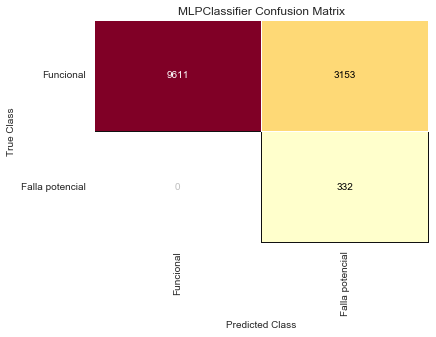



MEDIDAS DE DESEMPEÑO DEL MODELO


Exactitud - Accuracy: 0.7592394624312767
ROC AUC: 0.8764885615794422
------------------------------------------------------------
Precisión por clase: [1.         0.09526542]
Sensibilidad - Recall por clase: [0.75297712 1.        ]
F1 por clase: [0.8590838  0.17395861]
------------------------------------------------------------
F1 Macro: 0.5165212025589724
F1 Micro: 0.7592394624312768
F1 Weighted: 0.8417150172731105
------------------------------------------------------------
Sensibilidad - Recall Macro: 0.8764885615794422
Sensibilidad - Recall Micro: 0.7592394624312767
Sensibilidad - Recall Weighted: 0.7592394624312767
------------------------------------------------------------
Precisión Macro: 0.5476327116212338
Precisión Micro: 0.7592394624312767
Precisión Weighted: 0.9770638454884315
------------------------------------------------------------
Verdaderos positivos - True Positives: 332
Verdaderos negativos - True Negatives: 9611
Falsos positivo

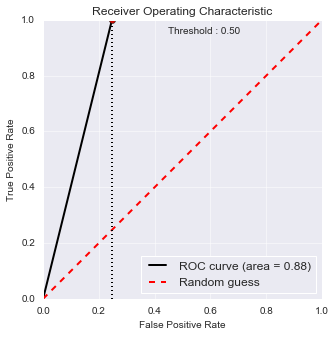

In [142]:
# model_evaluation(data_train, label_train, data_test, label_test, modelo, label_pred):
model_evaluation(data_train, label_train, data_test, label_test, modelo9, label_pred9)

In [143]:
report9 = classification_report(label_test, label_pred9, output_dict=True)
df9 = pd.DataFrame(report9).transpose()
df9.to_excel(writer, sheet_name='MLP 8')
writer.save()